# 5.2

In [1]:
from sympy import *
from dtumathtools import dtuplot
init_printing()

In [2]:
k1, k2, kc, kb2, l1, l2, lg, it = symbols('k_1 k_2 k_c k_{b2} l_1 l_2 l_g I_t', real=True, positive=True)
m2, mr, g, u, w, t, phiu = symbols('m_2 m_r g u omega t phi_u', real=True, positive=True)
xi, ks, F0s, hp, cs = symbols('xi k_s F_{0s} h_p c_s', real=True, positive=True)
z_1, z_2, omega, t = symbols("z_1, z_2 omega t")

M = Matrix([[l2**(-2)*it, 0], [0, m2]])
K = Matrix([[k2 + (-g*lg*mr + k1*l1**2 + kc)/l2**2, -k2], [-k2, 2*F0s*(cs+1)/hp + k2 + 2*ks*(I*xi+1) + kb2]])
F = Matrix([l2**-1*u*omega**2*(sin(phiu)-I*cos(phiu)), 0])

In [3]:
z_1, z_2, omega, t = symbols("z_1, z_2 omega t")
k_1, k_2, k_3, k_4 = symbols("k_1, k_2 k_3 k_4")
m_1, m_2 = symbols("m_1, m_2")
f_1, f_2 = symbols("f_1, f_2")

k_1, k_2, k_3, k_4 = K[0], K[1], K[2], K[3]
m_1, m_2 = M[0], M[1]
f_1, f_2 = F[0], F[1]

z = Matrix([z_1, z_2])*exp(I*omega*t)
k = K -omega**2 * M
f = Matrix([f_1, f_2])

mydict = {g:9.81,kc:0.7,u:14.8*10**(-6),
          phiu:7,mr:0.616,m2:1.410,it:31.2*10**(-3),
          lg:0.188,l1:0.118,l2:0.263,
          kb2:0.72*10**(3),k1:1.66*10**3,k2:1.61*10**3,
          hp:12*10**(-3), cs:0.24}

v30 = {ks:0.83, xi:33/100, F0s:5.2}
v50 = {ks:0.995, xi:21/100, F0s:8}
v70 = {ks:1.37, xi:10.5/100, F0s:9.65}

sol = k.gauss_jordan_solve(f)[0]
x = sol.subs(mydict)
x30 = x.subs(v30)
x50 = x.subs(v50)
x70 = x.subs(v70)


In [4]:
k.subs(mydict), f.subs(mydict)

⎛⎡                                      2                                     
⎜⎢1937.86021946248 - 0.451069120559788⋅ω                             -1610.0  
⎜⎢                                                                            
⎜⎢                                                                            
⎝⎣                -1610.0                  206.666666666667⋅F_{0s} + 2⋅kₛ⋅(ⅈ⋅ξ

                        ⎤  ⎡                     2                    ⎤⎞
                        ⎥  ⎢5.62737642585551e-5⋅ω ⋅(sin(7) - ⅈ⋅cos(7))⎥⎟
                        ⎥, ⎢                                          ⎥⎟
              2         ⎥  ⎣                    0                     ⎦⎟
 + 1) - 1.41⋅ω  + 2330.0⎦                                              ⎠

In [5]:
z130 = x30[0]
z230 = x30[1]
z_tilde_30 = Matrix([z130, z230])

z150 = x50[0]
z250 = x50[1]
z_tilde_50 = Matrix([z150, z250])

z170 = x70[0]
z270 = x70[1]
z_tilde_70 = Matrix([z170, z270])

---
## 5.3 
#### 30 grader

In [7]:
Ap1 = abs(z130)
Ap2 = abs(z230)

phip1 = arg(z130)
phip2 = arg(z230)

omegaer = [6, 7, 8, 9, 10.5]

yp = Matrix([Ap1*cos(omega*t+phip1), Ap2*cos(omega*t+phip2)])
yp = yp.subs(omega, 6)

# dtuplot.plot(yp[0], yp[1], (t, 0, 10), legend=False)

# 5.6

Ap1 : frekrvensrespons i lejehuset (vibrationsamplitude)

Ap2: frekvensrespons i aklsen (vibrationsamplitude)

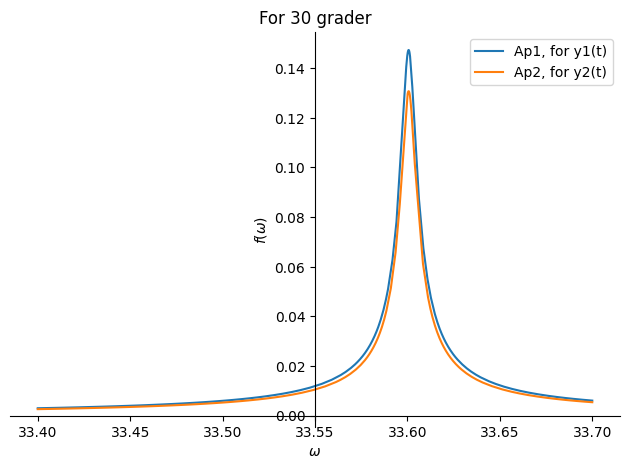

In [8]:
# OBS Kun for 30 grader nedenstående

Ap1_30 = abs(z130)
Ap2_30 = abs(z230)

p1 = plot(Ap1_30,(omega,33.4,33.7), show=False, use_cm= False, title = "For 30 grader", label = "Ap1, for y1(t)",legend=True)
p2 = plot(Ap2_30,(omega,33.4,33.7), show=False,use_cm = False,label = "Ap2, for y2(t)",legend=True)
p1.extend(p2)
p1.show()
# der hvor amplituden er højest, er der hvor der er mibdst faseforskydning, da de er synkrone. Dette er skidt for konstruktionen, det dette resuklterer i større udsving.



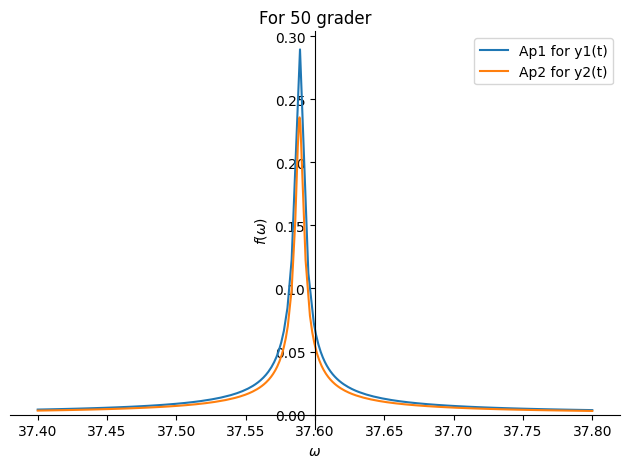

In [9]:
# OBS Kun for 50 grader nedenstående

Ap1_50 = abs(z150)
Ap2_50 = abs(z250)

p1 = plot(Ap1_50,(omega,37.4,37.8), show=False, use_cm= False, title = "For 50 grader",label = "Ap1 for y1(t)",legend=True)
p2 = plot(Ap2_50,(omega,37.4,37.8), show=False,use_cm = False, label = "Ap2 for y2(t)",legend=True)
p1.extend(p2)
p1.show()
# der hvor amplituden er højest, er der hvor der er mibdst faseforskydning, da de er synkrone. Dette er skidt for konstruktionen, det dette resuklterer i større udsving.



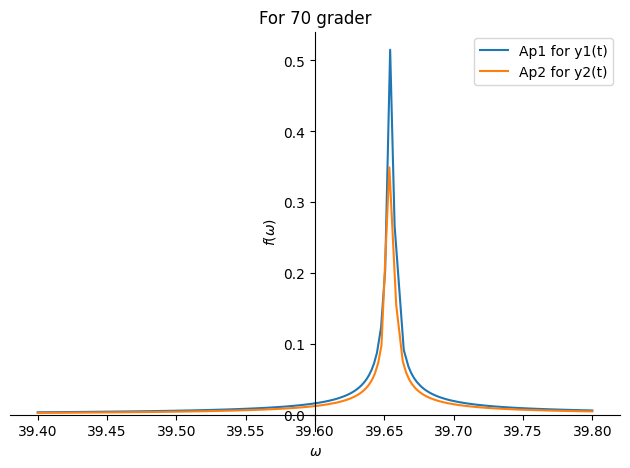

In [10]:
# OBS Kun for 70 grader nedenstående

Ap1_70 = abs(z170)
Ap2_70 = abs(z270)

p1 = plot(Ap1_70,(omega,39.4,39.8), show=False, use_cm= False, title = "For 70 grader", label = "Ap1 for y1(t)",legend=True)
p2 = plot(Ap2_70,(omega,39.4,39.8), show=False,use_cm = False, label = "Ap2 for y2(t)",legend=True)
p1.extend(p2)
p1.show()
# der hvor amplituden er højest, er der hvor der er mibdst faseforskydning, da de er synkrone. Dette er skidt for konstruktionen, det dette resuklterer i større udsving.



Kommanterer:

* Frekvensresponsen er højere ved højere temperatur, dette gælder både for lejehuset og akslen.

* Lejehuset betegnes y1, og er altså Ap1 for de tre temperaturer, hvorved akslen er y2 og altså Ap2 for de tre temperaturer.

* For alle temperaturer er resonansfrekvenserne højere i lejehuset, hvorimod de er lavere i akslen.

IKKE SVARET:

* Er det muligt at se en sammenhæng mellem frekvensresponset ovenfor og  egensvingningsfrekvensern,  deres
dæmpning og egensvingningsformern? 

* Hvordan kan det være at akslens vibrationer i nogle tilfælde mindskes selvom dæmpningen også
bliver mindre?

* Stemmer resultaterne overens med konklusionerne for de foregående opgaver? (Her tænkes især på
opgaverne 4.7, 4.8, 5.1, 5.4 og 5.5).


# 5.7

Finder antiresonanserne, som er der hvor Ap1 og Ap2, som er vibrationsamplituderne er så tæt på 0 som muligt, eller hvor de skærer x-aksen

In [11]:
def antires(z_tilde):
    løs_lejehus = (solve(Eq(z_tilde[0],0)))
    return ("Antiresonans opstår i lejehuset ved omega = ", abs(løs_lejehus[0]),"og",abs(løs_lejehus[1]))

display("30 grader", antires(z_tilde_30),
"50 grader:", antires(z_tilde_50),
"70 grader:", antires(z_tilde_70), " Med det menes, at omega skal være disse givne værdier for at antiresonans opstår. 0 er ikke super interessant, men er usikker på om det kan kasseres. I aklsen opstår det kun for omega = 0, derfor er det ikke det samme (dette er jeg usikker på tho)")

'30 grader'

('Antiresonans opstår i lejehuset ved omega = ', 0, 'og', 49.1511398301836)

'50 grader:'

('Antiresonans opstår i lejehuset ved omega = ', 0, 'og', 53.1645602324697)

'70 grader:'

('Antiresonans opstår i lejehuset ved omega = ', 0, 'og', 55.3971690836330)

' Med det menes, at omega skal være disse givne værdier for at antiresonans opstår. 0 er ikke super interessant, men er usikker på om det kan kasseres. I aklsen opstår det kun for omega = 0, derfor er det ikke det samme (dette er jeg usikker på tho)'

# 5.8

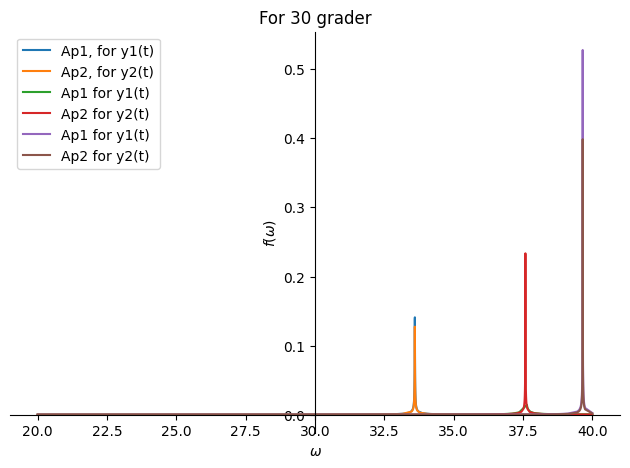

In [13]:
# Lægger de tre ovenstående plots sammen

p1 = plot(Ap1_30,(omega,0,40), show=False, use_cm= False, title = "For 30 grader", label = "Ap1, for y1(t)",legend=True)
p2 = plot(Ap2_30,(omega,20,40), show=False,use_cm = False,label = "Ap2, for y2(t)",legend=True)
p3 = plot(Ap1_50,(omega,20,40), show=False, use_cm= False, title = "For 50 grader",label = "Ap1 for y1(t)",legend=True)
p4 = plot(Ap2_50,(omega,20,40), show=False,use_cm = False, label = "Ap2 for y2(t)",legend=True)
p5 = plot(Ap1_70,(omega,20,40), show=False, use_cm= False, title = "For 70 grader", label = "Ap1 for y1(t)",legend=True)
p6 = plot(Ap2_70,(omega,20,40), show=False,use_cm = False, label = "Ap2 for y2(t)",legend=True)
p1.extend(p2)
p1.extend(p3)
p1.extend(p4)
p1.extend(p5)
p1.extend(p6)
p1.show()
